In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('../input/ted-talks/data.csv')

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,October 2021,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...
6,The myth of Narcissus and Echo,Iseult Gillespie,February 2022,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...
7,You deserve the right to repair your stuff,Gay Gordon-Byrne,August 2021,455000,13000,https://ted.com/talks/gay_gordon_byrne_you_des...
8,What nature can teach us about sustainable bus...,Erin Meezan,February 2022,66000,1900,https://ted.com/talks/erin_meezan_what_nature_...
9,The origins of blackface and Black stereotypes,Dwan Reece,March 2019,584000,17000,https://ted.com/talks/dwan_reece_the_origins_o...


There is a missing value in colunm auhtor

In [4]:
#finding missing value
null_value = df[df.isna().any(axis=1)]
null_value

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


In [5]:
#drop the row in which have missing value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   date    5439 non-null   object
 3   views   5439 non-null   int64 
 4   likes   5439 non-null   int64 
 5   link    5439 non-null   object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB


In [6]:
#converting to available dtypes
df['date2'] = pd.to_datetime(df['date'],format='%B %Y')
df['year'] = pd. DatetimeIndex(df['date2']).year
df['month'] = pd. DatetimeIndex(df['date2']). month



# **Which is the most viewed video?**

In [7]:
df.sort_values('views', ascending= False)

,title,author,date,views,likes,link,date2,year,month
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,2006-02-01,2006,2
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,2012-06-01,2012,6
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,2016-02-01,2016,2
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,2009-09-01,2009,9
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,2010-06-01,2010,6
...,...,...,...,...,...,...,...,...,...
478,The case for public media,Qi Wu 吴琪,November 2020,1500,47,https://ted.com/talks/qi_wu_the_case_for_publi...,2020-11-01,2020,11
1692,"""Part II. The Journey Through Time"" / ""Ruslan ...",Deutsche Philharmonie Merck,November 2018,1300,40,https://ted.com/talks/deutsche_philharmonie_me...,2018-11-01,2018,11
1064,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",Findlay Napier and Gillian Frame,July 2019,1300,40,https://ted.com/talks/findlay_napier_and_gilli...,2019-07-01,2019,7
552,Virtual Worlds,Far Flung,November 2020,1300,39,https://ted.com/talks/far_flung_virtual_worlds,2020-11-01,2020,11


"Do scholl kills creativity?" is the highest view. It was in Feb 2006

# **Which year has the highest view?**

In [8]:
df['year'].unique()

array([2021, 2022, 2019, 2016, 2017, 2020, 2015, 2014, 2018, 1970, 2012,
       2013, 2009, 2010, 2011, 1994, 2005, 2007, 2006, 1972, 2008, 2001,
       1983, 1991, 2004, 2003, 2002, 1998, 1990, 1984])

There are 29 years in column 'year'. To easily observing, we will take in range 2009-2022

In [9]:
df_copy = df[df['year'] > 2008]
df_grp = df_copy.groupby(['year'], as_index=False).sum()
df_grp

,year,views,likes,month
0,2009,557635000,16841500,1421
1,2010,528145999,15962900,1730
2,2011,575677999,17478900,1792
3,2012,803186000,24331209,1755
4,2013,1062537497,32249916,2276
5,2014,824652297,25076665,2540
6,2015,1154739598,35151746,2647
7,2016,928894896,28306782,2638
8,2017,998891600,30516328,3675
9,2018,811857597,24671493,3583


2015 is the highest views year

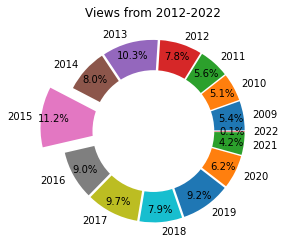

In [10]:
  
# Setting labels for items in Chart
year = df_grp['year']
  
# Setting size in Chart based on 
# given values
views = df_grp['views']
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.3, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05)
  
# Pie Chart
plt.pie(views, labels=year,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Views from 2012-2022')
  
# Displaying Chart
plt.show() 

# **How many shows have been produced in each year?**

In [11]:
df['year'].loc[df['year']>2008].value_counts().sort_index()

2009    233
2010    267
2011    271
2012    302
2013    388
2014    357
2015    376
2016    399
2017    495
2018    473
2019    544
2020    501
2021    390
2022     20
Name: year, dtype: int64

In [12]:
#counting the numbers of shows produced in each year
show_count = df['year'].loc[df['year']>2008].value_counts().sort_index().to_list()
show_count


[233, 267, 271, 302, 388, 357, 376, 399, 495, 473, 544, 501, 390, 20]

In [13]:
df_grp['show_count'] = show_count

In [14]:
x = df_grp['year'].values

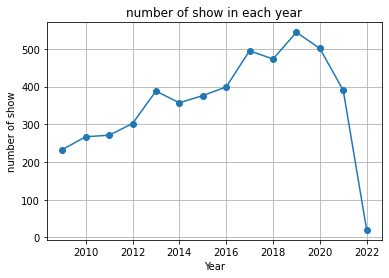

In [15]:
plt.plot(x, show_count,marker='o')
plt.title('number of show in each year')
plt.xlabel('Year')
plt.ylabel('number of show')
plt.grid(True)
plt.show()


TED started its prodution steadily from 2009 to 2012 and got its first peak in 2013. Then, there is a decrease in the quantity of show in 2014 but it countinued increase to the highest peak in 2019

# **The change of views from 2009 to 2022**

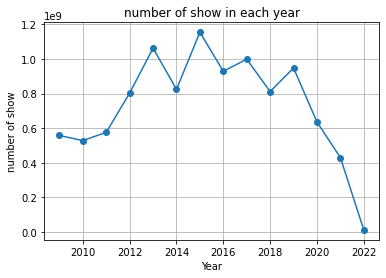

In [16]:
plt.plot(x, df_grp['views'],marker='o')
plt.title('number of show in each year')
plt.xlabel('Year')
plt.ylabel('number of show')
plt.grid(True)
plt.show()

The shape of two charts are similiar. So, I predict that there is a correlation between a number of show and a view in a year

# **Is there a correlation between a number of shows and a view in each year?**

In [17]:
#Checking the correclation relationship
pearson_coef, p_value = stats.pearsonr(show_count, df_grp['views'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7169658841173454  with a P-value of P = 0.0039038515720279288


(0.0, 619.9072639742832)

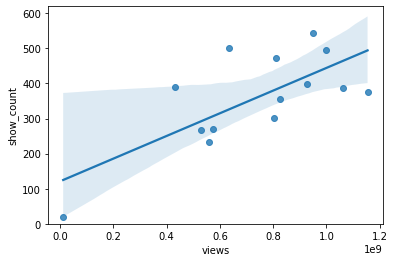

In [18]:
sns.regplot(x="views", y="show_count", data=df_grp)
plt.ylim(0,)

Based on The Pearson Correlation Coefficient and P-value, we can say there is a quite correlation relationship between two elements.

In [19]:
n = 0
show_change = []
for row in df_grp.iterrows():
    if n==0:
        show_change.append(0)
    else:
        show_change.append((df_grp['show_count'][n]-df_grp['show_count'][n-1])/df_grp['show_count'][n-1]*100)
    n += 1
df_grp['show_change'] = show_change

In [20]:
n = 0
view_change = []
for row in df_grp.iterrows():
    if n==0:
        view_change.append(0)
    else:
        view_change.append((df_grp['views'][n]-df_grp['views'][n-1])/df_grp['views'][n-1]*100)
    n += 1
df_grp['view_change'] = view_change
df_grp

,year,views,likes,month,show_count,show_change,view_change
0,2009,557635000,16841500,1421,233,0.000000,0.000000
1,2010,528145999,15962900,1730,267,14.592275,-5.288226
2,2011,575677999,17478900,1792,271,1.498127,8.999784
3,2012,803186000,24331209,1755,302,11.439114,39.520010
4,2013,1062537497,32249916,2276,388,28.476821,32.290341
5,2014,824652297,25076665,2540,357,-7.989691,-22.388405
6,2015,1154739598,35151746,2647,376,5.322129,40.027452
7,2016,928894896,28306782,2638,399,6.117021,-19.558063
8,2017,998891600,30516328,3675,495,24.060150,7.535482
9,2018,811857597,24671493,3583,473,-4.444444,-18.724154


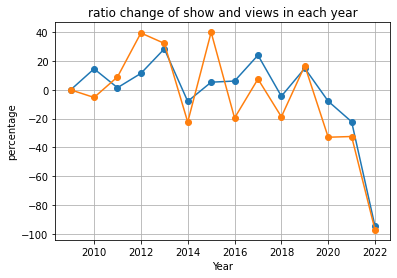

In [21]:
plt.plot(x, show_change,marker='o')
plt.plot(x, view_change,marker='o')
plt.title('ratio change of show and views in each year')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.grid(True)
plt.show()